In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load the data

In [ ]:
path = r"/content/supply_chain_data.csv"
df = pd.read_csv(path)
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [ ]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [ ]:
# Check if any missing values
np.sum(df.isna())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


## **Product Analysis**

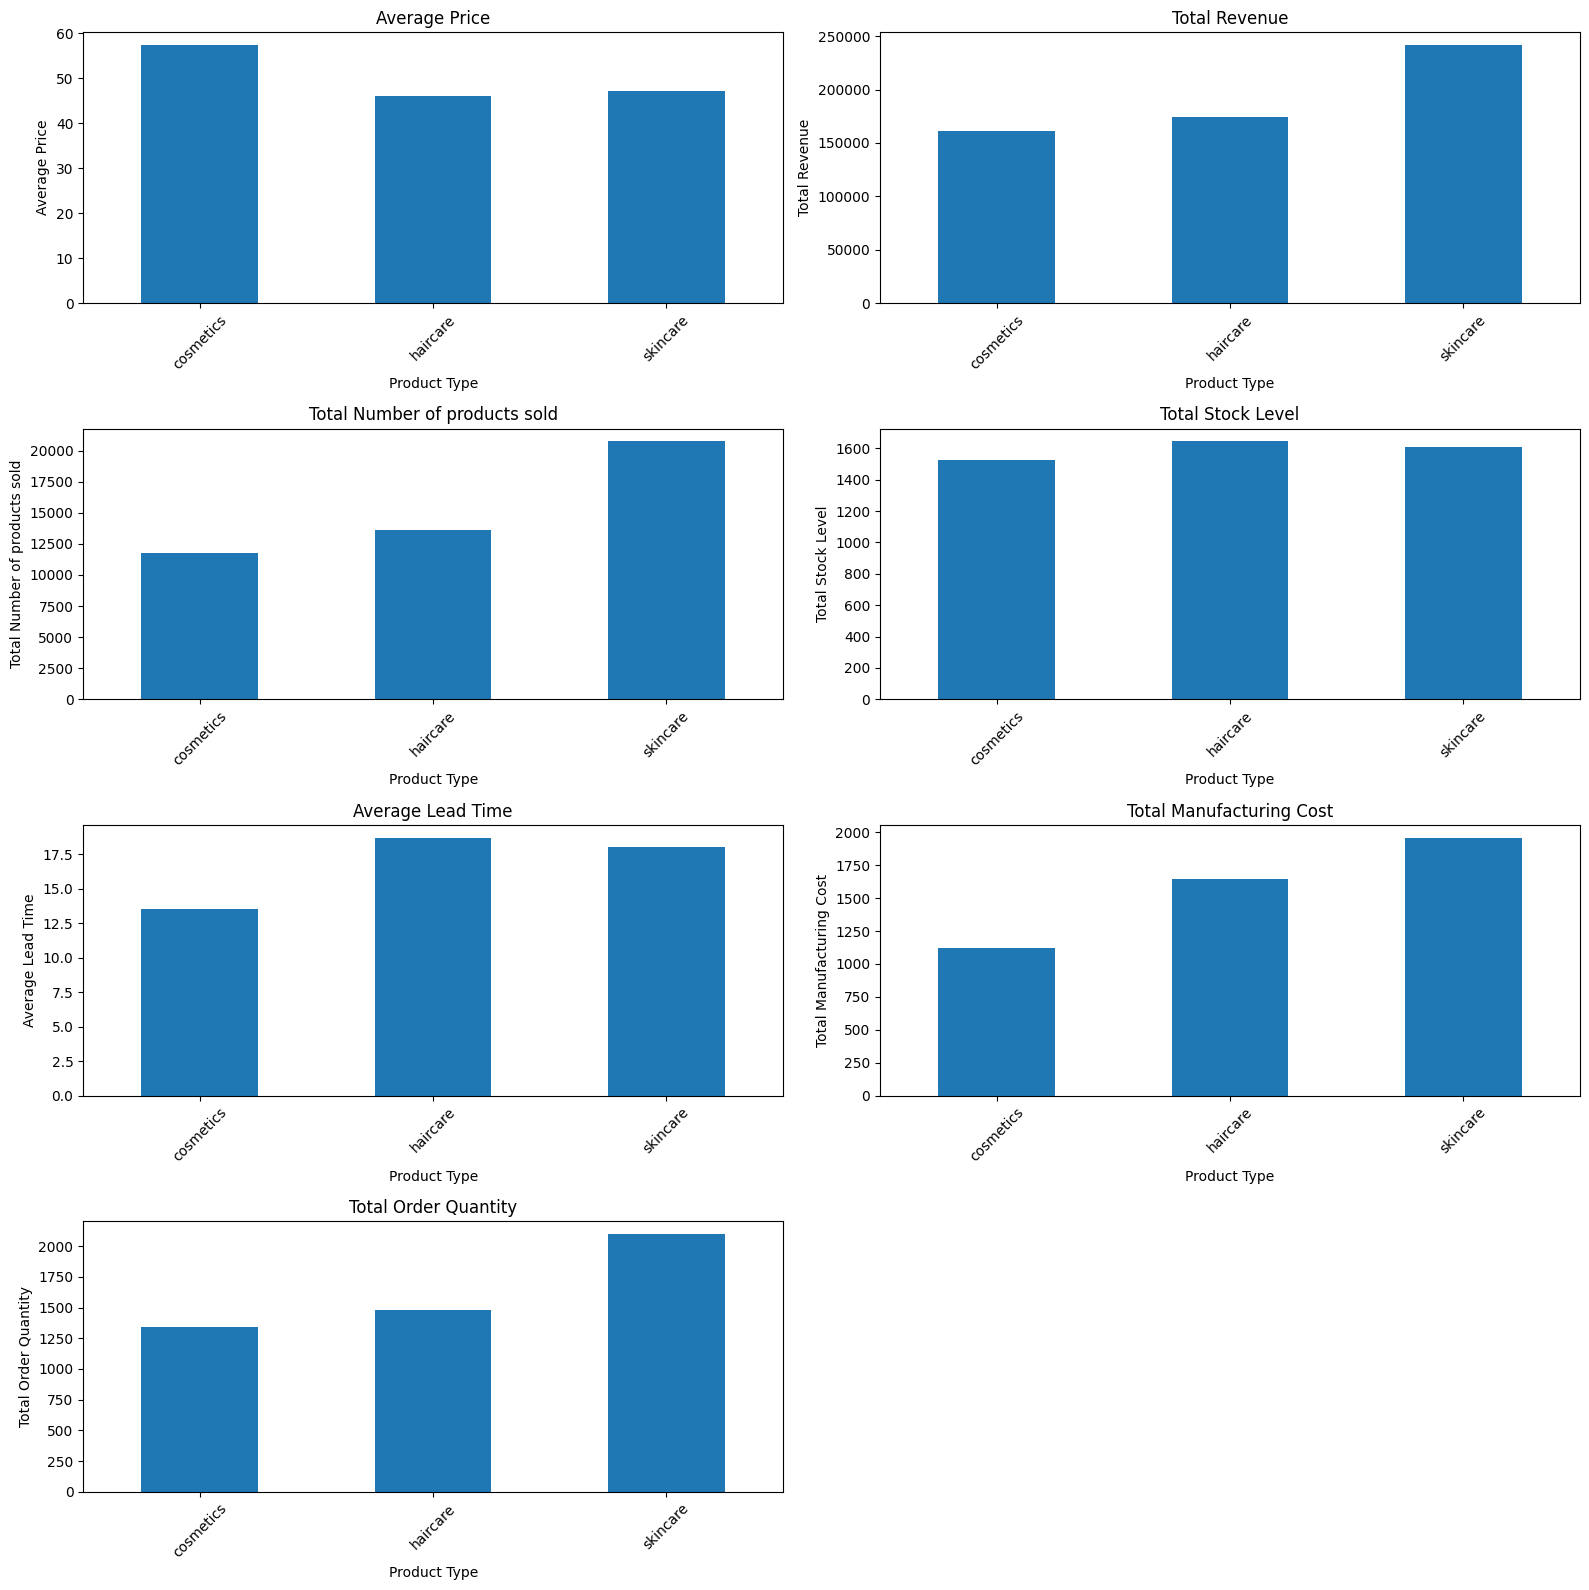

In [ ]:
# Fixing the number of subplots to match the number of metrics (7 metrics)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
axes = axes.flatten()

# Recalculate with the additional metric
grouped = df.groupby("Product type").agg({
    "Price": "mean",
    "Revenue generated": "sum",
    "Number of products sold": "sum",
    "Stock levels": "sum",
    "Lead time": "mean",
    "Manufacturing costs": "sum",
    "Order quantities": "sum"
}).rename(columns={
    "Price": "Average Price",
    "Revenue generated": "Total Revenue",
    "Number of products sold": "Total Number of products sold",
    "Stock levels": "Total Stock Level",
    "Lead time": "Average Lead Time",
    "Manufacturing costs": "Total Manufacturing Cost",
    "Order quantities": "Total Order Quantity"
})

# Plot each metric
for i, metric in enumerate(grouped.columns):
    grouped[metric].plot(kind='bar', ax=axes[i])
    axes[i].set_title(metric)
    axes[i].set_xlabel("Product Type")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplot axes
for j in range(len(grouped.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Inventory Turnover**

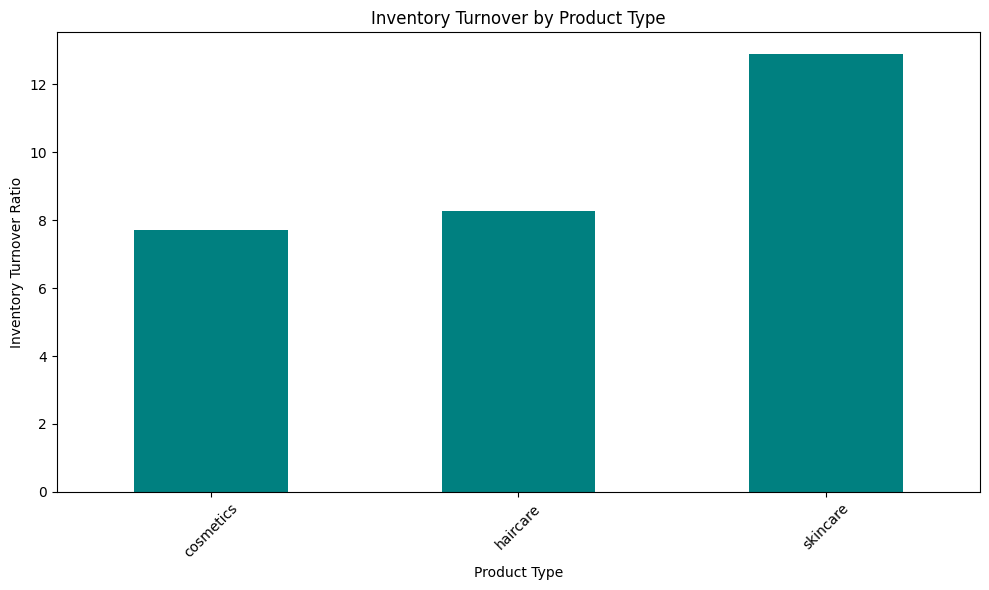

In [16]:
# Calculate Inventory Turnover using: Total Products Sold / Total Stock Level
inventory_turnover = df.groupby("Product type").agg({
    "Number of products sold": "sum",
    "Stock levels": "sum"
})

# Compute inventory turnover
inventory_turnover["Inventory Turnover"] = (
    inventory_turnover["Number of products sold"] / inventory_turnover["Stock levels"]
)

# Plot result
plt.figure(figsize=(10, 6))
inventory_turnover["Inventory Turnover"].plot(kind='bar', color='teal')
plt.title("Inventory Turnover by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Inventory Turnover Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Implications**
Skincare products have the lowest average price, highest number of sold, number of order, revenue generated and inventory turnover.

## **Supplier Performance Analysis**


<ipython-input-4-eae25b344819>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(supplier_stats.index, rotation=45, ha='right')


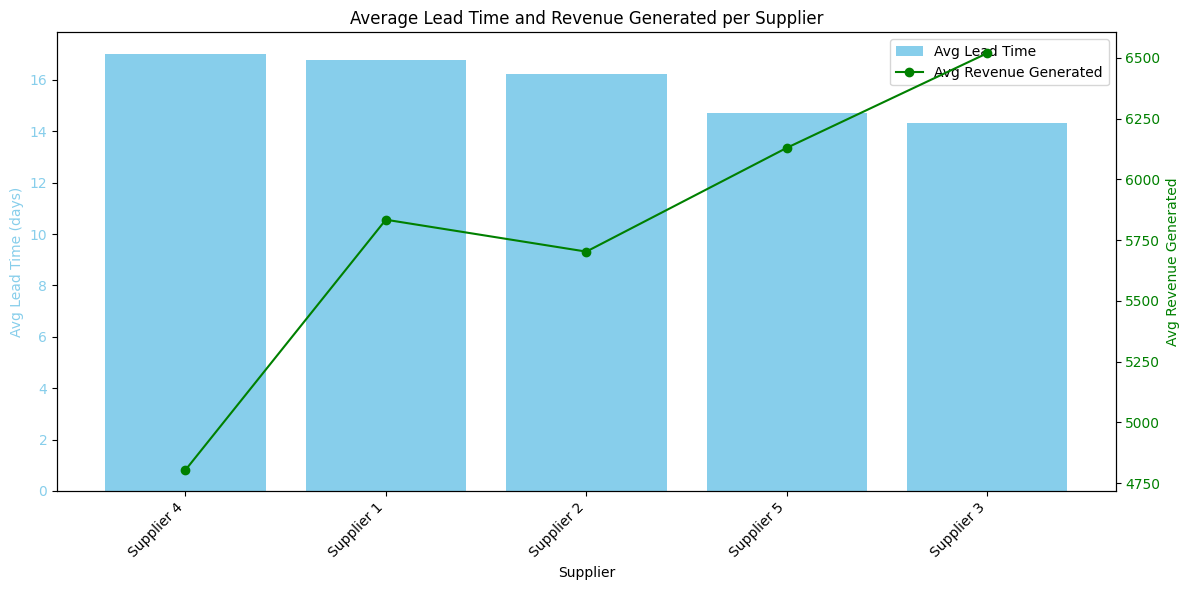

In [ ]:
supplier_stats = df.groupby("Supplier name").agg({
    "Lead times": "mean",
    "Revenue generated": "mean",
}).sort_values(by="Lead times", ascending=False)

# Plot average lead time with average revenue generated only

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average lead time
ax1.bar(supplier_stats.index, supplier_stats["Lead times"], color='skyblue', label='Avg Lead Time')
ax1.set_xlabel("Supplier")
ax1.set_ylabel("Avg Lead Time (days)", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(supplier_stats.index, rotation=45, ha='right')

# Line chart for average revenue generated on a second y-axis
ax2 = ax1.twinx()
ax2.plot(supplier_stats.index, supplier_stats["Revenue generated"], color='green', marker='o', label='Avg Revenue Generated')
ax2.set_ylabel("Avg Revenue Generated", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title("Average Lead Time and Revenue Generated per Supplier")
plt.tight_layout()
plt.show()


Based on the chart above, supplier 3 and 5 would be a better choice since they have higher revenue generated with loweer average leadtime compare with other suppliers.

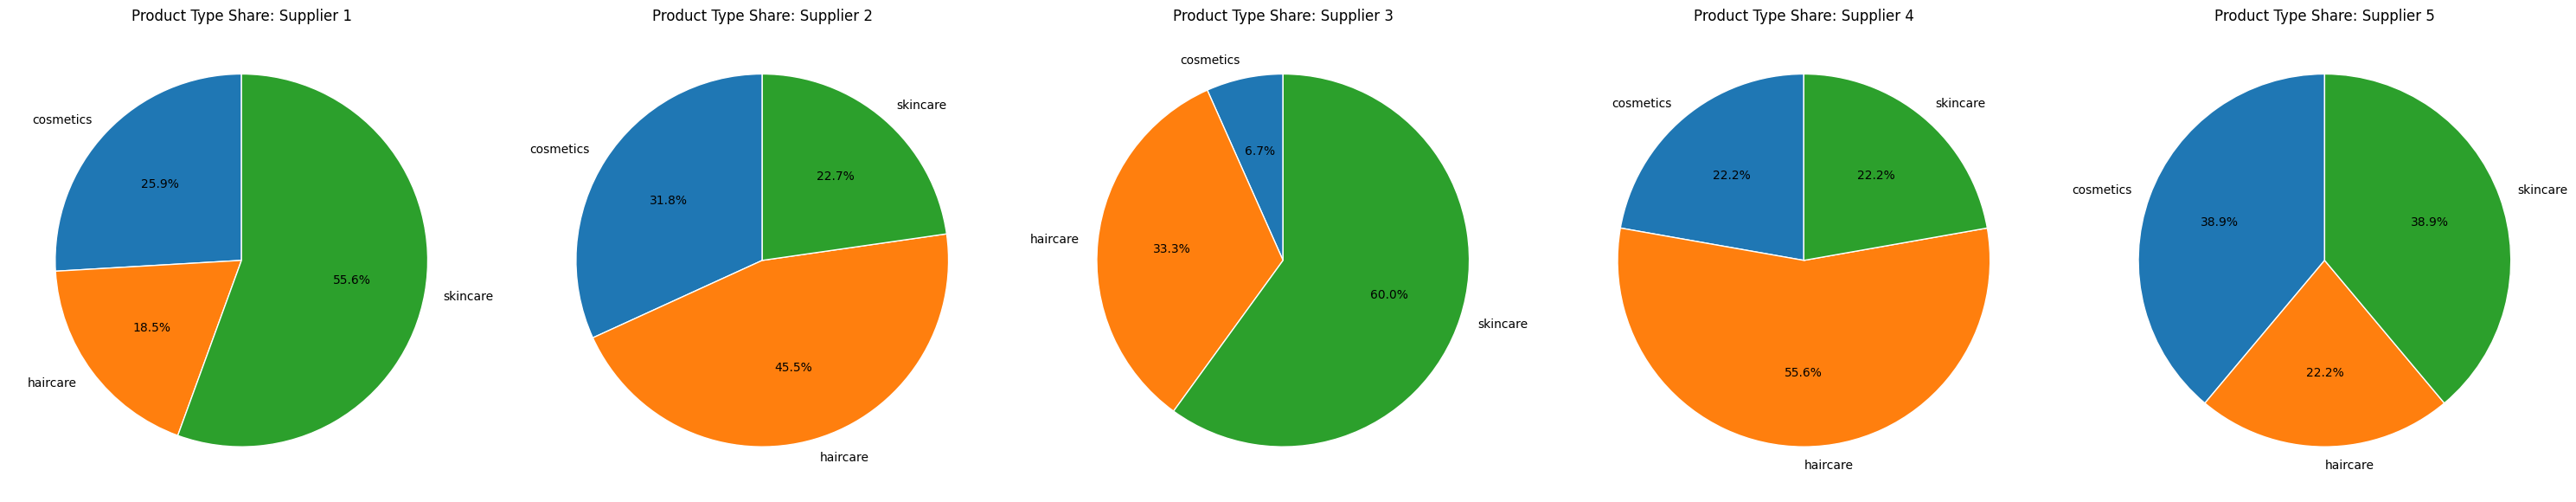

In [17]:
# Calculate the count of each product type under each supplier
product_supplier_counts = df.groupby(["Supplier name", "Product type"]).size().unstack(fill_value=0)

# Convert to percentage
product_supplier_percent = product_supplier_counts.div(product_supplier_counts.sum(axis=1), axis=0) * 100

# Plot pie chart for each supplier
num_suppliers = len(product_supplier_percent)
fig, axes = plt.subplots(nrows=1, ncols=num_suppliers, figsize=(6 * num_suppliers, 6))

if num_suppliers == 1:
    axes = [axes]  # Make axes iterable

for ax, supplier in zip(axes, product_supplier_percent.index):
    ax.pie(
        product_supplier_percent.loc[supplier],
        labels=product_supplier_percent.columns,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'white'}
    )
    ax.set_title(f"Product Type Share: {supplier}")

plt.tight_layout()
plt.show()


**ABC Analysis**

In [ ]:
# Step 1: Group by supplier and sum revenue
supplier_revenue = df.groupby("Supplier name")["Revenue generated"].sum()
supplier_revenue = supplier_revenue.sort_values(ascending=False)

# Step 2: Calculate cumulative revenue percentage
total_revenue = supplier_revenue.sum()
cumulative_percentage = supplier_revenue.cumsum() / total_revenue

# Step 3: Assign ABC class based on cumulative percentage
abc_class = cumulative_percentage.apply(
    lambda x: 'A' if x <= 0.7 else ('B' if x <= 0.9 else 'C')
)

# Step 4: Combine into final DataFrame
abc_df = pd.DataFrame({
    "Total Revenue": supplier_revenue,
    "Cumulative %": cumulative_percentage,
    "ABC Class": abc_class
})
abc_df

,Total Revenue,Cumulative %,ABC Class
Supplier name,,,
Supplier 1,157528.995039,0.272728,A
Supplier 2,125467.418605,0.489948,A
Supplier 5,110343.463656,0.680984,A
Supplier 3,97795.979638,0.850297,B
Supplier 4,86468.961799,1.000000,C


**Supplier Scorecard**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Aggregate required metrics per supplier
scorecard_data = df.groupby("Supplier name").agg({
    "Costs": "mean",
    "Defect rates": "mean",
    "Lead time": "mean",
    "Revenue generated": "mean",
    "Production volumes": "mean",
    "Manufacturing lead time": "mean"
})

# Step 2: Normalize values (Min-Max Scaling)
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(scorecard_data)

normalized_df = pd.DataFrame(normalized_values, columns=scorecard_data.columns, index=scorecard_data.index)
percent_df = normalized_df * 100

# Step 3: Define weights
weights = {
    "Costs": 0.20,
    "Defect rates": 0.20,
    "Lead time": 0.15,
    "Revenue generated": 0.15,
    "Production volumes": 0.15,
    "Manufacturing lead time": 0.15
}

# Step 4: Calculate weighted score
scorecard_df = percent_df.copy()
scorecard_df["Score"] = sum(scorecard_df[col] * weight for col, weight in weights.items())

# Step 5: Assign grade based on score
def assign_grade(score):
    if score >= 75:
        return 'A'
    elif score >= 50:
        return 'B'
    else:
        return 'C'

scorecard_df["Grade"] = scorecard_df["Score"].apply(assign_grade)
scorecard_df


,Costs,Defect rates,Lead time,Revenue generated,Production volumes,Manufacturing lead time,Score,Grade
Supplier name,,,,,,,,
Supplier 1,100.000000,0.000000,0.000000,60.060350,0.000000,0.000000,29.009053,C
Supplier 2,43.589521,64.879821,70.350811,52.405902,92.092977,80.153015,65.944274,B
Supplier 3,0.000000,76.836010,100.000000,100.000000,20.777696,62.574257,57.869995,B
Supplier 4,49.985665,61.937912,8.298755,0.000000,100.000000,73.267327,49.619628,C
Supplier 5,63.387054,100.000000,61.203320,77.298247,12.876009,100.000000,70.384047,B


No suppliers were classified as "A". Considering the fast-moving characteristics of fashion and beauty industry, I adjust the weight of the overall lead time and manufacturing lead time, and remove the weight of production volume.

In [ ]:
# Redefine the updated weights due to earlier error
updated_weights = {
    "Costs": 0.15,
    "Defect rates": 0.20,
    "Lead time": 0.25,
    "Revenue generated": 0.15,
    "Production volumes": 0.0,  # Removed from weighting
    "Manufacturing lead time": 0.25
}

# Recalculate the updated score
scorecard_df["Updated Score"] = sum(scorecard_df[col] * weight for col, weight in updated_weights.items())

# Reassign updated grade
scorecard_df["Updated Grade"] = scorecard_df["Updated Score"].apply(assign_grade)

# Prepare final result DataFrame
scorecard_result = scorecard_df[[
    "Costs", "Defect rates", "Lead time", "Revenue generated",
    "Manufacturing lead time", "Updated Score", "Updated Grade"
]]

scorecard_result


,Costs,Defect rates,Lead time,Revenue generated,Manufacturing lead time,Updated Score,Updated Grade
Supplier name,,,,,,,
Supplier 1,100.000000,0.000000,0.000000,60.060350,0.000000,24.009053,C
Supplier 2,43.589521,64.879821,70.350811,52.405902,80.153015,65.001234,B
Supplier 3,0.000000,76.836010,100.000000,100.000000,62.574257,71.010766,B
Supplier 4,49.985665,61.937912,8.298755,0.000000,73.267327,40.276953,C
Supplier 5,63.387054,100.000000,61.203320,77.298247,100.000000,81.403625,A


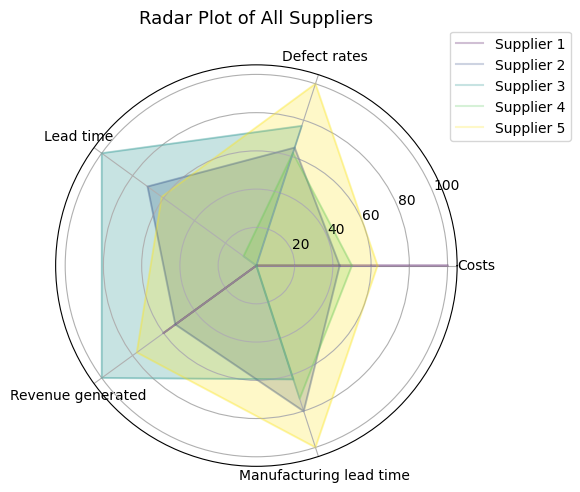

In [ ]:
# Select top 3 suppliers by updated score for visualization
top_suppliers = scorecard_df.sort_values("Updated Score", ascending=False).head(3)

# Radar plot variables
categories = ["Costs", "Defect rates", "Lead time", "Revenue generated", "Manufacturing lead time"]
N = len(categories)

# Prepare radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Radar plot with filled areas and color adjustment
plt.figure(figsize=(6, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(scorecard_df)))

for idx, (supplier, color) in enumerate(zip(scorecard_df.index, colors)):
    values = scorecard_df.loc[supplier, categories].tolist()
    values += values[:1]  # Complete the loop
    plt.polar(angles, values, label=supplier, color=color, alpha=0.25)
    plt.fill(angles, values, color=color, alpha=0.25)

# Configure the plot
plt.xticks(angles[:-1], categories, fontsize=10)
plt.title("Radar Plot of All Suppliers", size=13, pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


The best supplier is Supplier 5

## **Logistics Analysis**

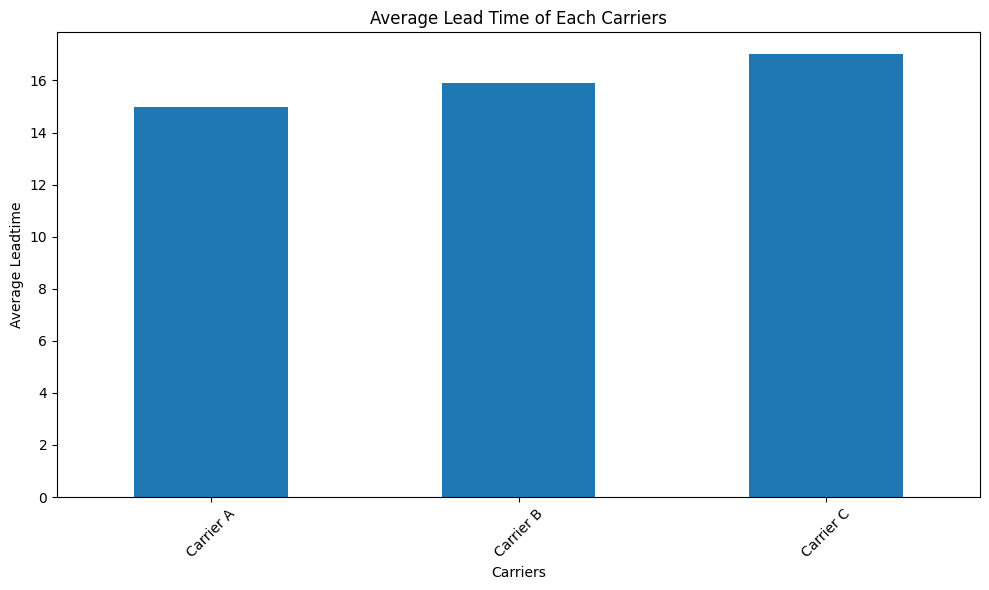

In [ ]:
carrier_leadtime = df.groupby("Shipping carriers")["Lead times"].mean()

# Plot the result
plt.figure(figsize=(10, 6))
carrier_leadtime.plot(kind='bar')
plt.title('Average Lead Time of Each Carriers')
plt.xlabel('Carriers')
plt.ylabel('Average Leadtime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()